## View colored parametric map previously generated from QuantUS workflow

This colored parametric map uses a pre-defined colormap to visualize the numerical values of a parametric map.

In the section after this, we will view the numerical values behind the colored parametric map, which can
also be used to make a new visualization with a different colormap.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
im_path = '/media/das/TOSHIBA EXT/P-Selectin Data/Feb+July dTE Paramaps/C1M2/batch_2/day_1/LEFT/image.npy'

im = np.load(im_path)

In [30]:
numerical_paramap_path = '/media/das/TOSHIBA EXT/P-Selectin Data/Feb+July dTE Paramaps/C1M2/batch_2/day_1/LEFT/DTE_TIC_numerical.npy'
pixdims_path = '/media/das/TOSHIBA EXT/P-Selectin Data/Feb+July dTE Paramaps/C1M2/batch_2/day_1/LEFT/pix_dims.npy'

pixdims = np.load(pixdims_path)
numerical_paramap = np.load(numerical_paramap_path)

In [31]:
im.shape, numerical_paramap.shape, pixdims

((105, 68, 54, 553), (105, 68, 54), array([0.7, 0.7, 0.7]))

In [32]:
np.nanmax(numerical_paramap), np.nanmin(numerical_paramap)

(np.float32(131.03703), np.float32(15.37037))

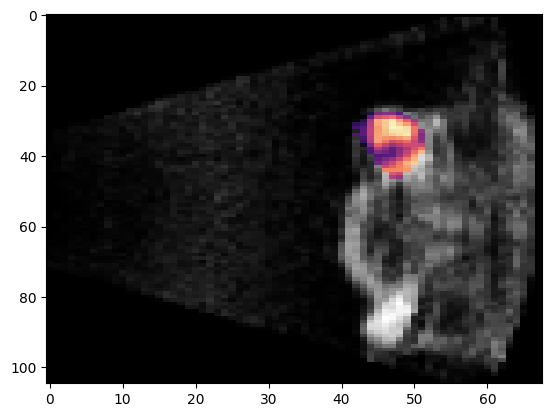

In [35]:
ax_frame = 26
frame = 100

plt.imshow(im[:, :, ax_frame, frame], cmap='gray', aspect='auto')
plt.imshow(numerical_paramap[:, :, ax_frame], cmap='magma', alpha=0.9, aspect='auto')

## 3D visualization of parametric map

In [36]:
# These pixdims may need to be read in the reverse order depending on how the data is structured.
affine = np.eye(4)
for i, dim in enumerate(pixdims):
    affine[i, i] = dim

In [37]:
import napari

viewer = napari.Viewer()
viewer.add_image(im.T, name='Image', colormap='gray', blending='additive', affine=affine)
viewer.add_image(numerical_paramap.T, name='Parametric Map', colormap='turbo', blending='additive', opacity=0.7, affine=affine)

<Image layer 'Parametric Map' at 0x7f6b6cb5d8d0>